**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.mixture import GaussianMixture
!pip install bioinfokit
!pip install pandas matplotlib scikit-learn statsmodels
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**Collecting data**

In [ ]:
df = pd.read_csv("mcdonalds.csv")

**Exploring data**

In [ ]:
print(df.shape)

(1453, 15)


In [ ]:
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


In [ ]:
# Select the first 11 columns
MD_x = df.iloc[:, :11]
MD_x.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [ ]:
# Calculate the column means
col_means = MD_x.mean(axis=0)

In [ ]:
# Round the column means to 2 decimal places
rounded_col_means = col_means.round(2)

print(rounded_col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


The avg values of the transformed binary numeric segmentation variables indicate that about 55% perceive McDonald’s as yummy,
91% believe that eating at McDonald’s is convenient, but only 9% think that the food is spicy.

Principal component analysis

In [ ]:
pca_data = preprocessing.scale(MD_x)

pca = PCA(n_components=11)
pc = pca.fit_transform(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [ ]:
pf[['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']].std()

pc1     0.757050
pc2     0.607456
pc3     0.504619
pc4     0.398799
pc5     0.337405
pc6     0.310275
pc7     0.289697
pc8     0.275122
pc9     0.265251
pc10    0.248842
pc11    0.236903
dtype: float64

In [ ]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = MD_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [ ]:
# get PC scores
pca_scores = PCA().fit_transform(MD_x)

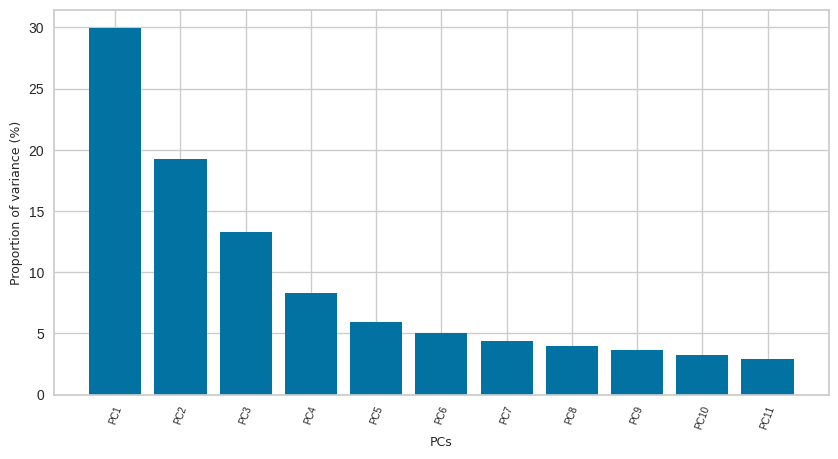

In [ ]:
#Scree plot (Elbow test)- PCA
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

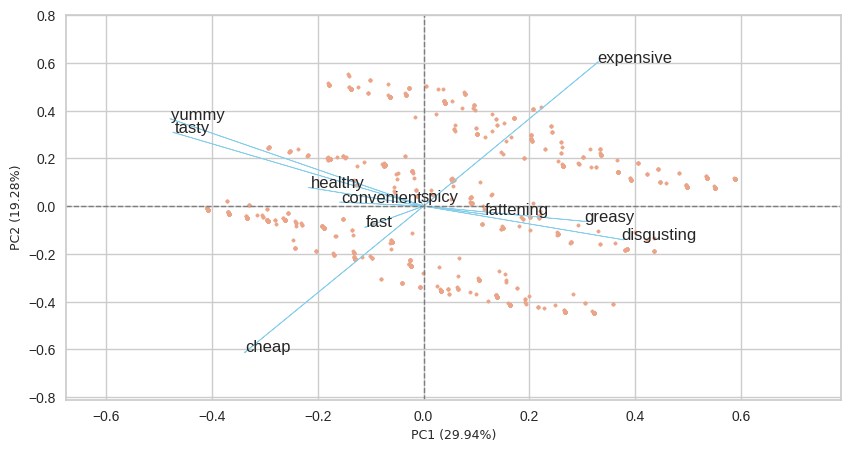

In [ ]:
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

**Extracting Segments**

Using K-means

In [ ]:
# Using elbow method
wcss = []
for i in range(1,11):
  # init is used for initializing the centroid
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 10)
  kmeans.fit(MD_x)
  wcss.append(kmeans.inertia_)


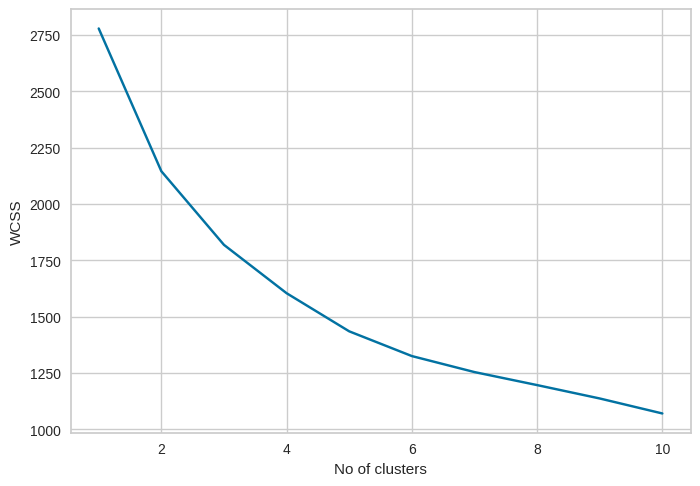

In [ ]:
plt.plot(range(1,11),wcss)
plt.xlabel(range(1,11))
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

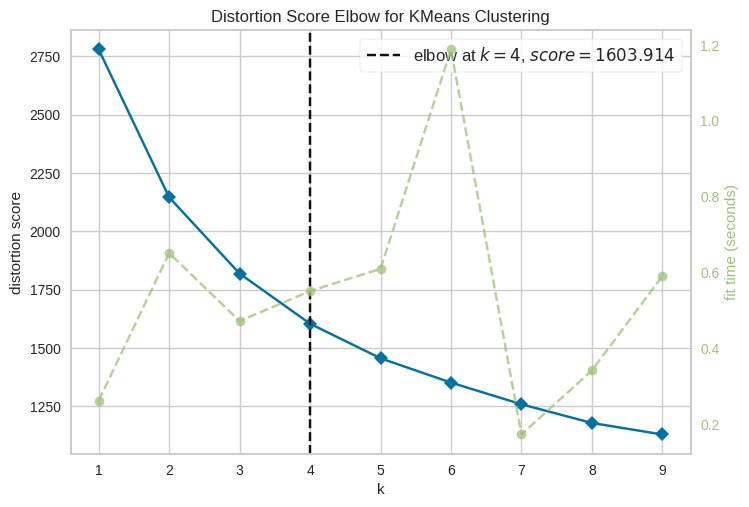

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(MD_x)
visualizer.show()

In [ ]:
k_means_model = KMeans(4)
k_means_model.fit_predict(MD_x)
pf_kmeans= pd.concat([pf,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)

In [ ]:
pf_kmeans.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,cluster
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074,1
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440,0
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741,0
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034,2
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245,1


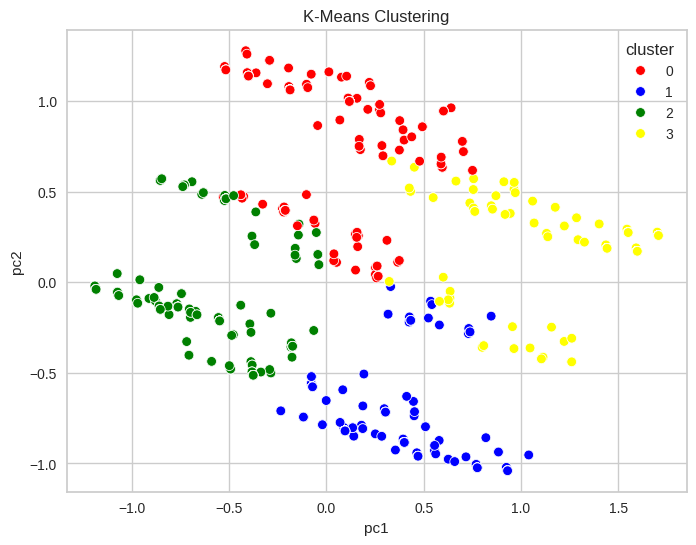

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.scatterplot(x="pc1",y="pc2",hue="cluster",data=pf_kmeans,palette=['red','blue','green','yellow'])
plt.title('K-Means Clustering')
plt.show()

In [ ]:
k_means_model = KMeans(4)
k_means_model.fit_predict(MD_x)
pf_kmeans1= pd.concat([MD_x,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
pf_kmeans1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,3
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,3


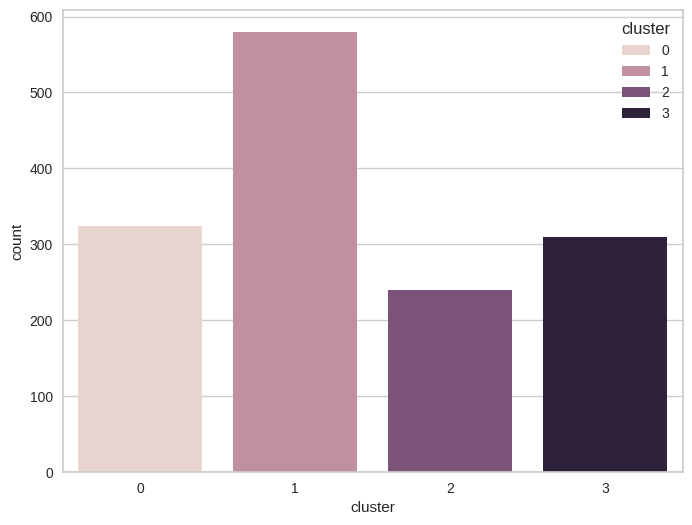

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='cluster', data=pf_kmeans1, hue='cluster')
plt.show()

In [ ]:
pf_kmeans1['cluster'].value_counts(normalize=True)*100

cluster
1    39.917412
0    22.298692
3    21.266345
2    16.517550
Name: proportion, dtype: float64

**Profiling segments**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

In [ ]:
# Perform hierarchical clustering
dist_matrix = pdist(MD_x.T)  # Transpose the data and compute distance matrix
linkage_matrix = linkage(dist_matrix, method='ward')  # Perform hierarchical clustering

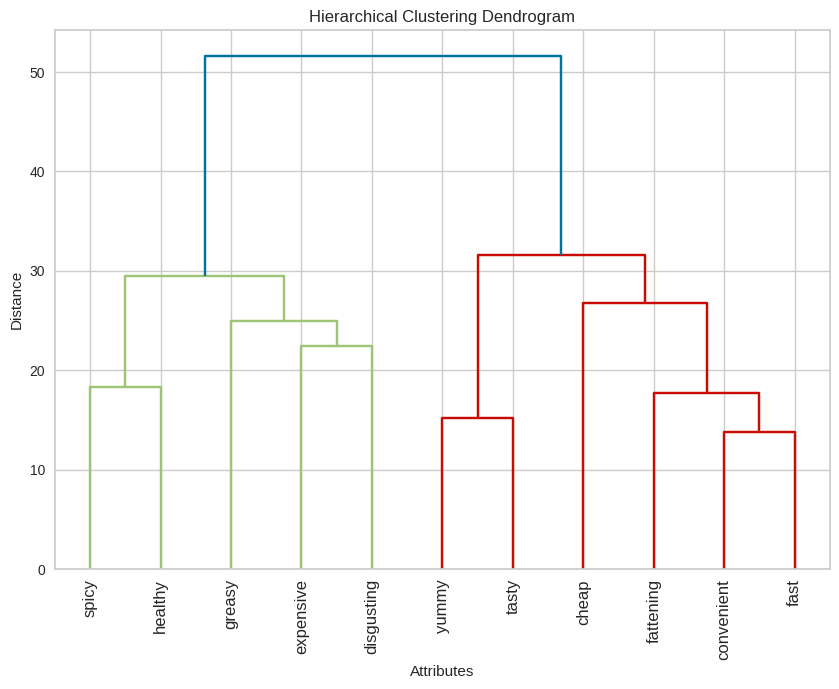

In [ ]:
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=MD_x.columns, leaf_rotation=90)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Attributes')
plt.ylabel('Distance')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=10).fit(MD_x)
MD_k4 = kmeans.labels_

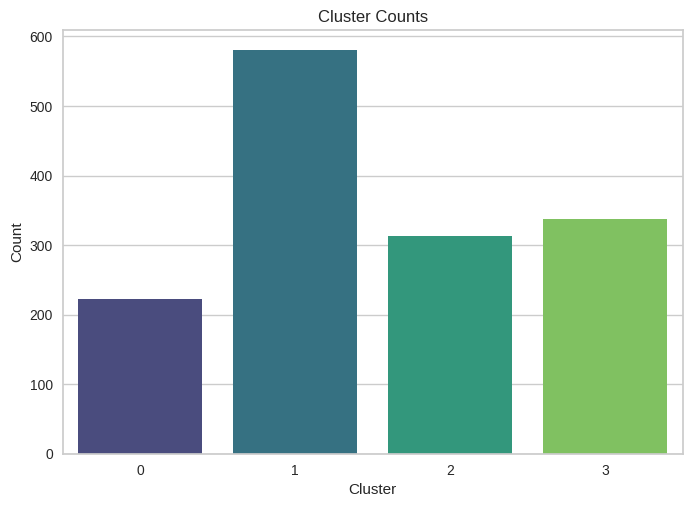

In [ ]:
cluster_counts = pd.Series(MD_k4).value_counts().sort_index()
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [ ]:
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)

In [ ]:
pca = PCA(n_components=2)
MD_pca = pca.fit_transform(MD_x_scaled)

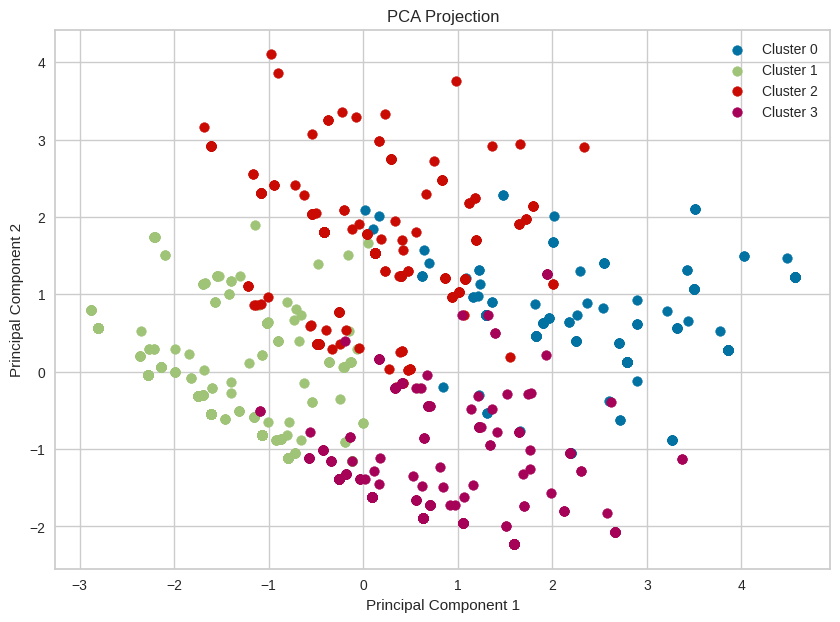

In [ ]:
# Plotting the PCA projection
plt.figure(figsize=(10, 7))
for cluster in np.unique(MD_k4):
    plt.scatter(MD_pca[MD_k4 == cluster, 0], MD_pca[MD_k4 == cluster, 1], label=f'Cluster {cluster}')
plt.title('PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

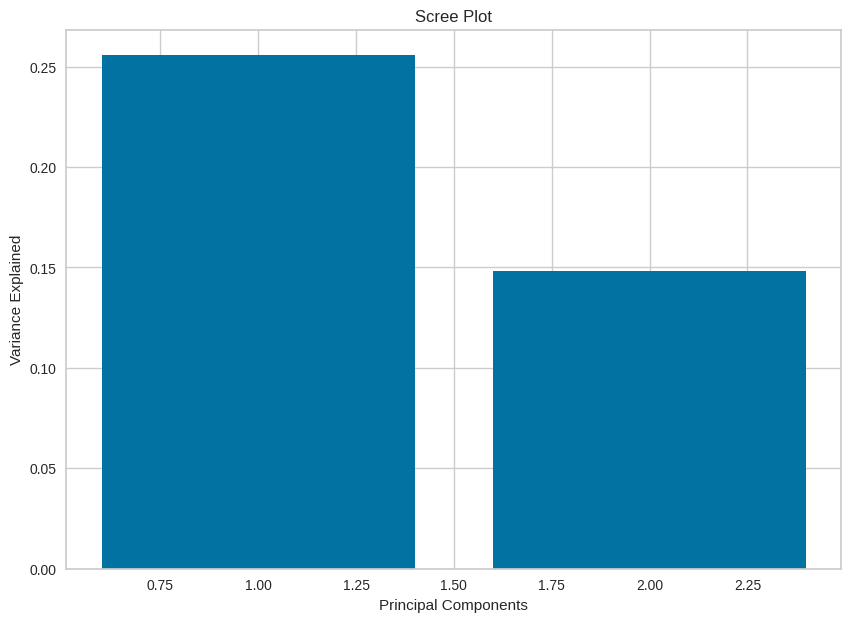

In [ ]:
# Plot the explained variance ratio of PCA components
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()


**Describing Segments**

In [ ]:
df= pd.concat([df,pd.DataFrame({'cluster':k_means_model.labels_})],axis=1)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,3
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,3


In [ ]:
df['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [ ]:
df['Like'] = df['Like'].replace({'I hate it!-5':0 ,'-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
df.tail()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
1448,0,1,0,1,1,0,0,0,1,0,1,0,47,Once a year,Male,2
1449,1,1,0,1,0,0,1,1,0,1,0,7,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,8,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,9,41,Every three months,Male,1
1452,0,1,0,1,1,0,0,0,1,0,1,2,30,Every three months,Male,2


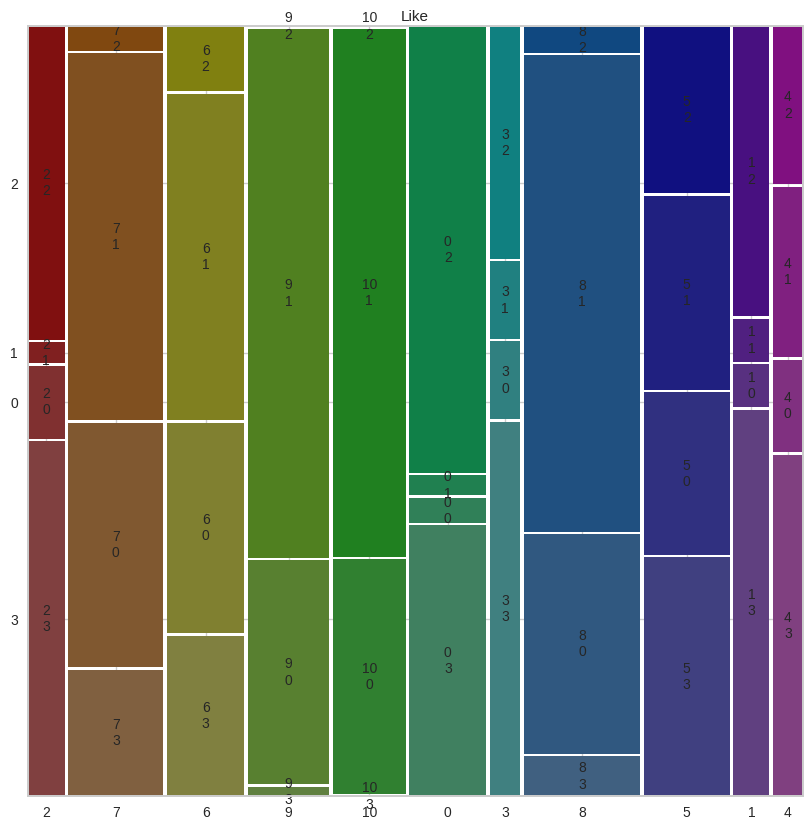

In [ ]:
plt.rcParams['figure.figsize']=(10,10)
mosaic(df,['Like','cluster'])
plt.xlabel('Like')
plt.show()


In [ ]:
df['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [ ]:
df['Gender'] = df['Gender'].replace({'Female':0, 'Male':1})

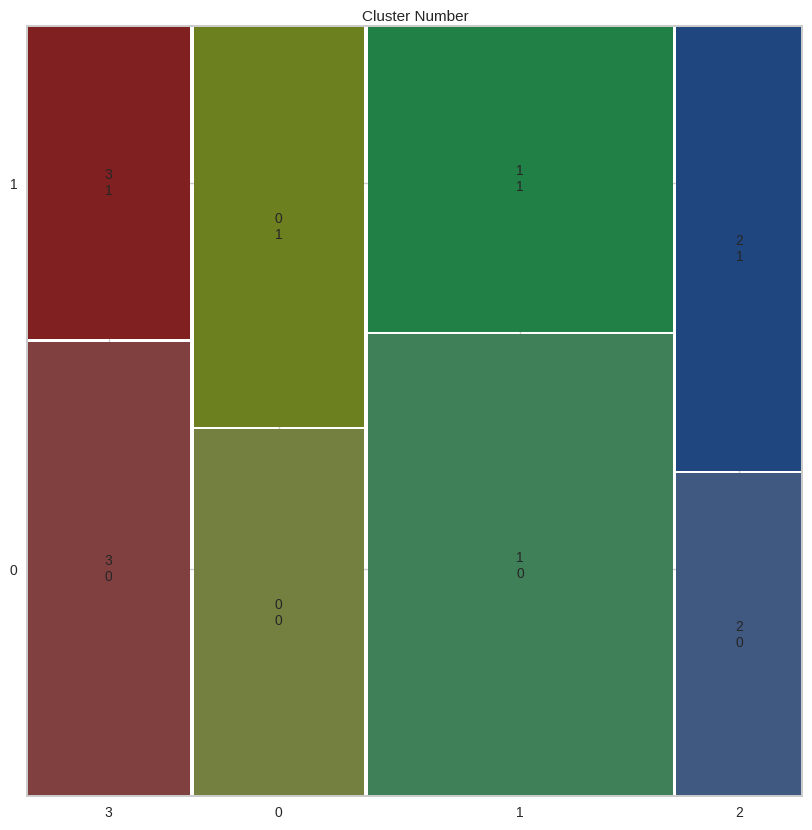

In [ ]:
mosaic(df,['cluster','Gender'])
plt.xlabel('Cluster Number')
plt.show()

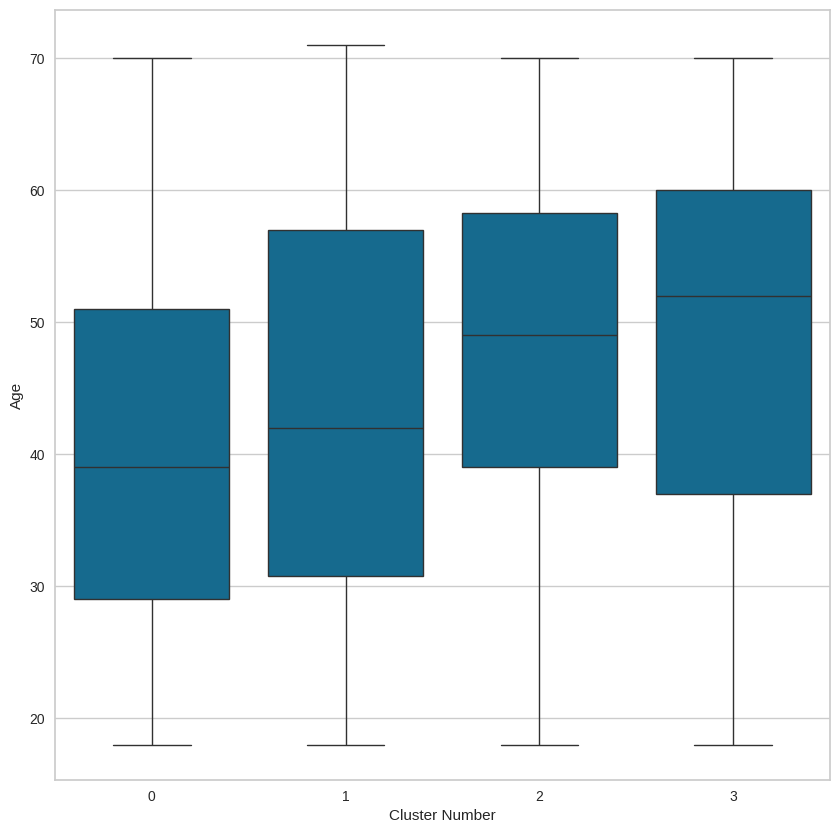

In [ ]:
sns.boxplot(x=df['cluster'], y=df['Age'])
plt.xlabel('Cluster Number')
plt.show()

**Selecting the target segment**

In [ ]:
df['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [ ]:
df['VisitFrequency'] = df['VisitFrequency'].replace({'Never':0, 'Once a week':1, 'More than once a week':2, 'Once a month':3, 'Every three months':4, 'Once a year':5})
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,4,0,3
1,1,1,0,1,1,1,1,1,1,0,0,7,51,4,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,4,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,1,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,3


In [ ]:
X = df.iloc[:,0:15]
Y = df.iloc[:,15]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(1017, 15)
(436, 15)


In [ ]:
X_test.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
1176,1,1,0,1,1,1,1,1,0,1,0,9,35,3,0
1332,1,1,0,1,1,1,0,1,1,0,0,9,40,1,0
941,1,0,0,1,1,1,0,1,1,0,0,9,21,3,0
878,1,1,0,1,1,1,1,1,1,1,0,9,34,1,0
35,0,1,0,1,1,1,1,0,0,0,1,3,54,4,0


In [ ]:
Y_test.head()

1176    1
1332    0
941     0
878     0
35      3
Name: cluster, dtype: int32

In [ ]:
dc = DecisionTreeClassifier(random_state=1234)
model = dc.fit(X, Y)

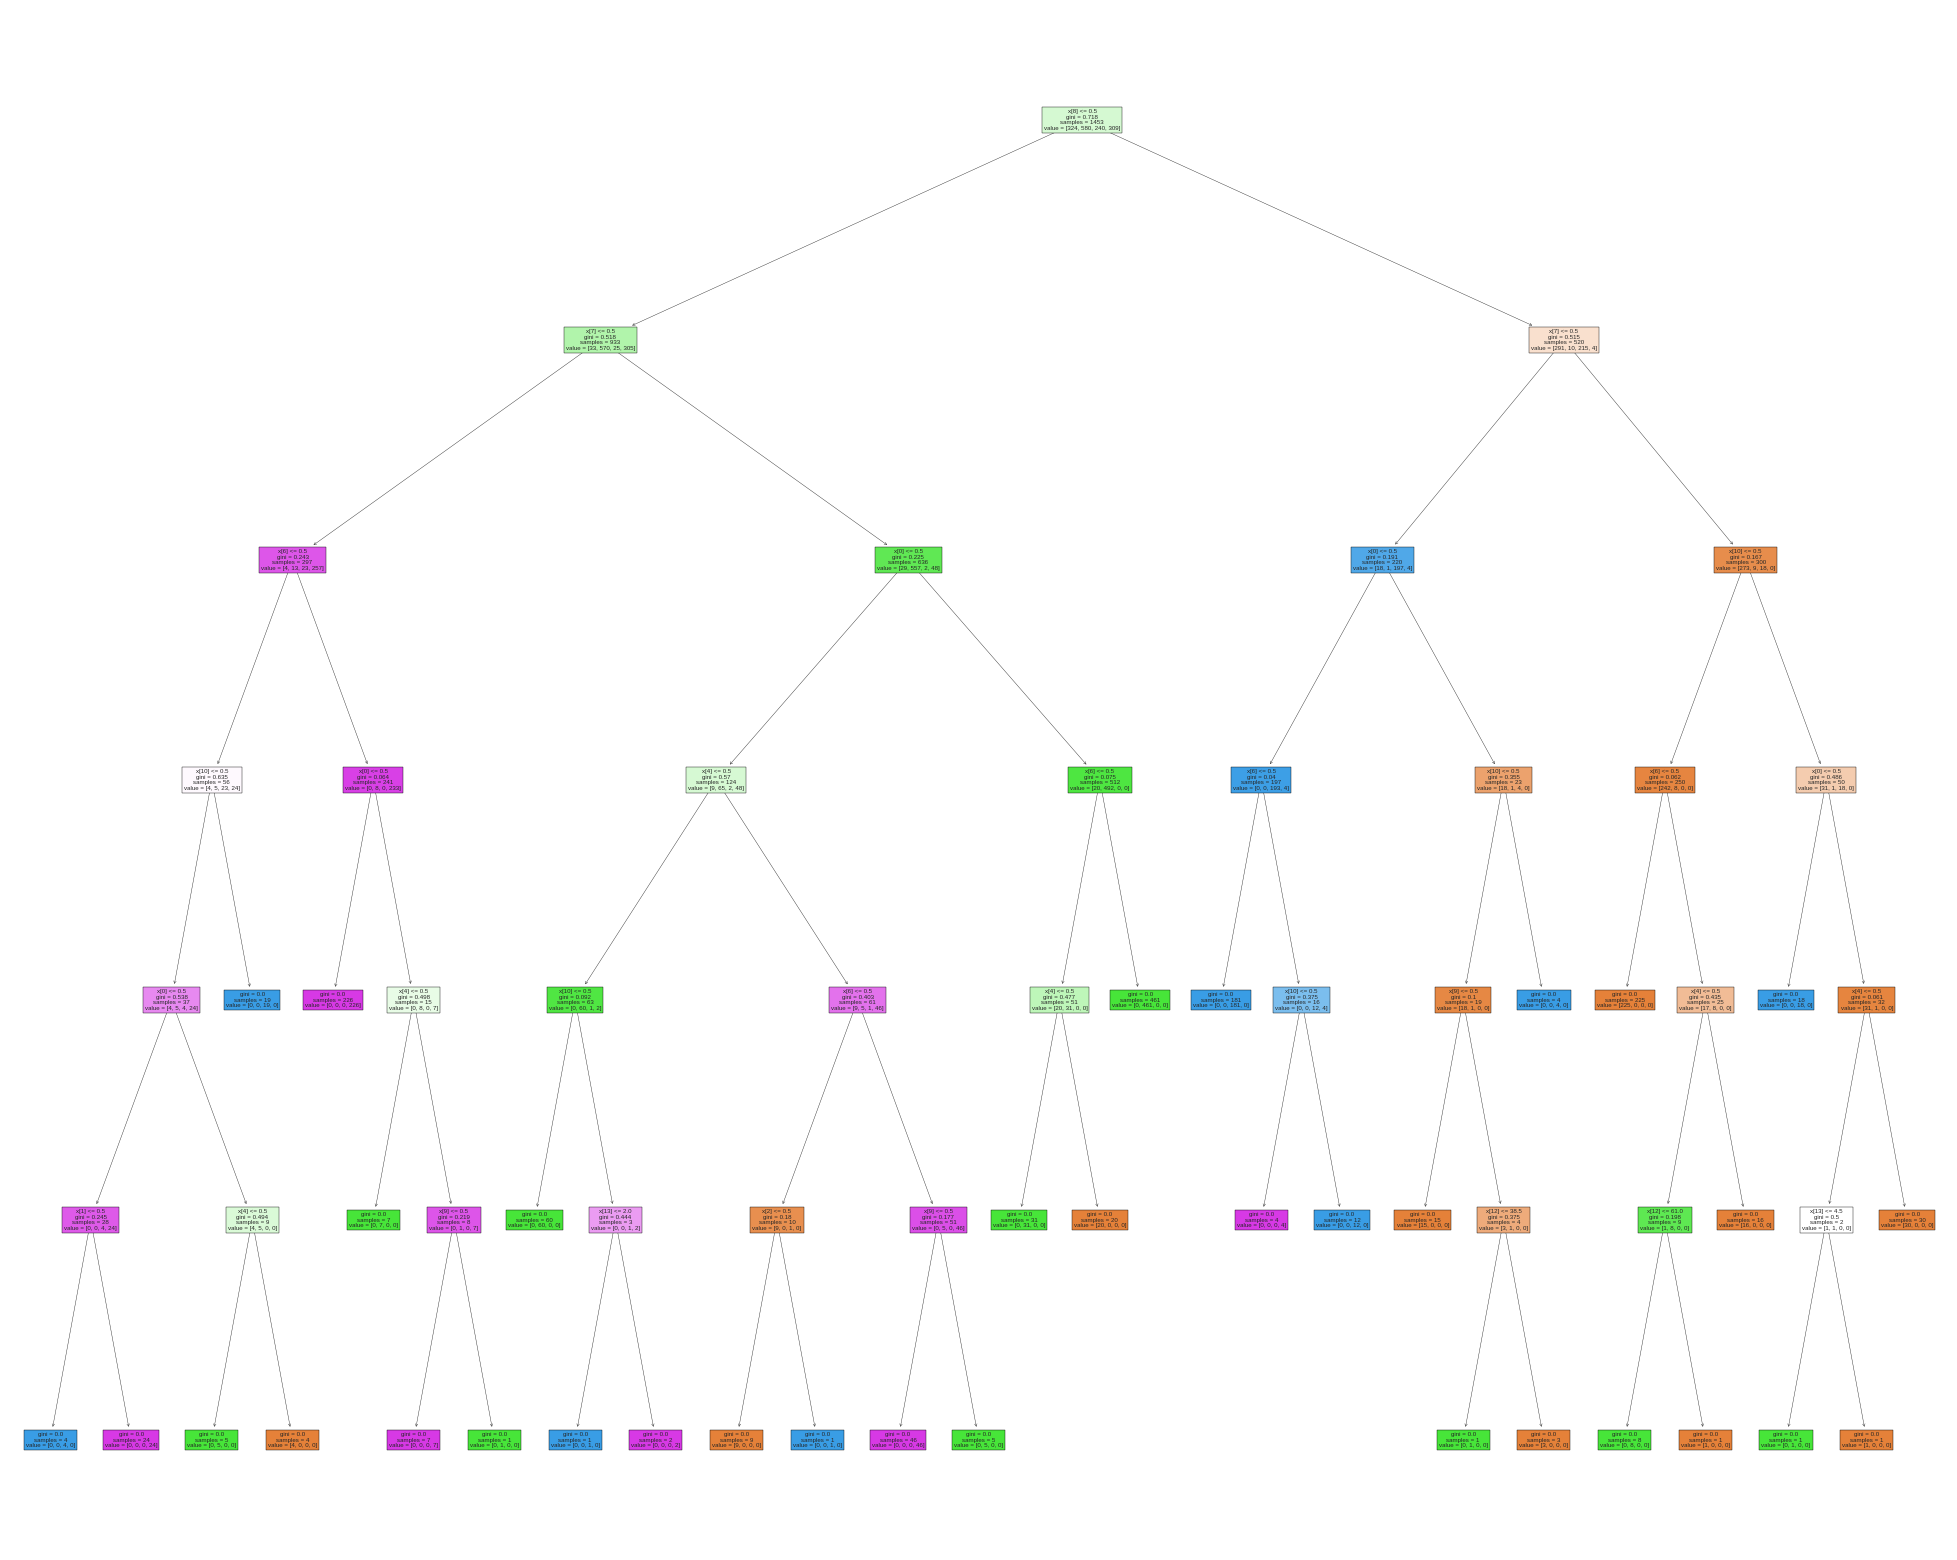

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dc, filled=True)